<a href="https://colab.research.google.com/github/kkr016/NER_Using_Scispacy/blob/main/_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technique and packages used: Natural Language Processing, Data Pre-processing, Sentiment Analysis, Named Entities Recognition, Spacy, Scispacy, Pandas, Numpy, visualization, etc.,

**The Approach to achieve the solutions** 

-  To implement the approach for Objective 1 problem is no leaned toward Data Preprocessing. (Cleaning data and removing Unnecessary elements from it.) Useless elements: Emojis, URL links, and others.
- Because I am using Scispacy package for the Named entity recognition, which is mainly packed for scientific entities. Such as Chemicals, Diseases, Drugs, and also for general entities.



Steps involved in solving the Objective 1 are:


*   Download and import necessary packages & Download the Scispacy and Spacy module for the corpus
*   Raw data analysis
*   Conversion of Raw data to Data frame
*   Data Pre-processing (Cleaning Tweets)
    *   Finding text with URL and remove
    *   Replacing punctuations with space
    *   Word less than 2 character
    *   make entire text lowercase
    * remove stop words
    * Lemmatization


*   Check and compare the Spacy, Scispacy large module, Scispacy – module BC5CDR
*	 Extracting Entities from the tweets with their frequency using Scispacy large module
*	Data Visualization
*	Solution of Objective 1 (done)

#	Download and import necessary packages

In [ ]:
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 5.1 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.2
    Uninstalling spacy-3.4.2:
      Successfully uninstalled spacy-3.4.2


In [ ]:
!pip install --upgrade spacy[cuda111,transformers]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 99.1 MB 1.2 MB/s 
     |████████████████████████████████| 1.1 MB 10.1 MB/s 
     |████████████████████████████████| 4.7 MB 36.1 MB/s 
     |████████████████████████████████| 6.6 MB 18.8 MB/s 
     |████████████████████████████████| 163 kB 50.3 MB/s 


Trying downloaded spacy modules

In [ ]:
!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_trf
#!python -m spacy download en_core_web_sm

2022-11-16 07:07:19.251542: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


The given data sets is about the scientific and medicines. Hence, Scispacy is the suitable package to implement named entity extraction instead of spacy.

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.0 MB/s 
     |████████████████████████████████| 13.5 MB 9.4 MB/s 
     |████████████████████████████████| 71 kB 9.3 MB/s 
     |████████████████████████████████| 188 kB 59.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 532.3 MB 25 kB/s 
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.5.1-py3-none-any.whl size=532571828 sha256=2ebc275beedb4590f01ddca1c3950e86c485eb714d1b06aa4af0a9ed7bcf3471
  Stored in directory: /root/.cache/pip/wheels/e7/2f/b9/43b24c872b3a382fdf12d75ed4c3be623885d6ff65df495b21
Successfully built en-core-sci-lg


A ScispaCy BC5CDR corpus for finding Chemical names and diseases.

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120.2 MB 101 kB/s 
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.1-py3-none-any.whl size=120217645 sha256=b9db0e71ccf43e2a048657e2872b44ab03b5ed04077ea95ad5041416f8440c59
  Stored in directory: /root/.cache/pip/wheels/3d/bd/f9/ba91bbe81e2da54f31b66c144ccdf5dddc83778691b8f80151
Successfully built en-ner-bc5cdr-md


In [ ]:
import spacy
import scispacy

import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.autonotebook import tqdm
from spacy import displacy
import json

creating nlp object for both spacy modules



1.   en_core_web_lg




In [ ]:
#nlp = spacy.load("en_core_web_trf")
nlp = spacy.load("en_core_web_lg")
#nlp_sm = spacy.load("en_core_web_sm")

In [ ]:
nlp.component_names

['tok2vec',
 'tagger',
 'parser',
 'senter',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
nlp.get_pipe('ner').labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

creating nlp object for both scispacy modules


1.   en_core_sci_lg
2.   en_ner_bc5cdr_md

component of the nlp objects

In [ ]:
sci_nlp1=spacy.load("en_core_sci_lg")
sci_nlp2 = spacy.load("en_ner_bc5cdr_md")

In [ ]:
print("components of 'en_core_sci_lg':",sci_nlp1.component_names)
print("components of 'en_ner_bc5cdr_md':",sci_nlp2.component_names)

components of 'en_core_sci_lg': ['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']
components of 'en_ner_bc5cdr_md': ['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']


exploring the lables

In [ ]:
print("NER labels of 'en_core_sci_lg':",sci_nlp1.get_pipe('ner').labels)
print("NER labels of 'en_ner_bc5cdr_md':",sci_nlp2.get_pipe('ner').labels)

NER labels of 'en_core_sci_lg': ('ENTITY',)
NER labels of 'en_ner_bc5cdr_md': ('CHEMICAL', 'DISEASE')


#	Raw data analysis

In [ ]:
import json
with open('tweets.json') as j:
  raw_tweets = json.load(j)

In [ ]:
type(raw_tweets),raw_tweets

(dict,
 {'1374140386071961602': {'tweet_author': 'Hematopoiesis News',
   'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'},
  '1374032432173842437': {'tweet_author': 'Michael Wang, MD',
   'tweet_text': 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'},
  '1373902876553048065': {'tweet_author': '1stOncology',
   'tweet_text': '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'},
  '1373656782367813635': {'tweet_author': 'Toby Eyre',
   'tweet_text': '#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly Vie

#Conversion of Raw data to Dataframe

In [ ]:
#converting json to pandas dataframe
data = pd.DataFrame.from_dict(raw_tweets, orient = "index")

In [ ]:
data.head(2)

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...


In [ ]:
data['tweet_text']

1374140386071961602    ⚕️ Scientists conducted a Phase II study of ac...
1374032432173842437    This phase 2 Acalabrutinib-Venetoclax (AV) tri...
1373902876553048065    #NICE backs #AstraZenecas #Calquence for #CLL ...
1373656782367813635    #acalabrutinib is a valuable option in pts int...
1372941634334232586    NICE has recommended the use of acalabrutinib ...
                                             ...                        
551103473643945985     Hanging out with Friends! :) #FF #CLL #Happine...
551102786675290112     Hanging out with Friends! :) #FF #CLL #Happine...
550969541186953217     Zusatznutzen von #Idelalisib ist weder für #CL...
550941480525635584     #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...
550579446537678849     #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...
Name: tweet_text, Length: 43347, dtype: object

#dataCleaning


In [ ]:
#remove url from the tweet 
isURL = re.compile(r'http[s]?:// (?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', re.VERBOSE | re.IGNORECASE)
def url(y):
    y = isURL.sub("",y)
    return y
data['tweet_text_processed'] = data['tweet_text'].apply(lambda y:url(y))

In [ ]:
# Replacing punctuations with space
data['tweet_text_processed'] = data['tweet_text_processed'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# replace short words
data['tweet_text_processed'] = data['tweet_text_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
# make entire text lowercase
data['tweet_text_processed'] = [t.lower() for t in data['tweet_text_processed']]

Removing Stopwords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')


# Function to remove stop words 
def remove_stopwords(twe):
    # word tokenized
    tweet_tokenized = word_tokenize(twe)
    #again join the list of tokenized words
    tweet_new = " ".join([i for i in tweet_tokenized  if i not in stop_words])
    return tweet_new

# Removing stopwords
data['tweet_text_processed'] = [remove_stopwords(t) for t in data['tweet_text_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')


lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

# Finds & Convert the POS tag into simple tags

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
      if tag is None:
        lemmatized_sentence.append(word)
      else:
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


data['tweet_text_processed'] = data['tweet_text_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data["tweet_text_processed"].iloc[:5]

1374140386071961602    scientist conduct phase study acalabrutinib pa...
1374032432173842437    phase acalabrutinib venetoclax trial still rec...
1373902876553048065                 nice back astrazenecas calquence cll
1373656782367813635    acalabrutinib valuable option pt intolerant ib...
1372941634334232586    nice recommend use acalabrutinib patient treat...
Name: tweet_text_processed, dtype: object

#Named Entity Recognition

#	Check and compare the Spacy, Scispacy large module, Scispacy – module BC5CDR

convert processsed tweet_text to list of strings

In [ ]:
tweets=data.to_dict()
type(tweets),tweets.keys()

(dict, dict_keys(['tweet_author', 'tweet_text', 'tweet_text_processed']))

In [ ]:
tweet=list(tweets['tweet_text_processed'].values())
len(tweet),tweet[:10]

(43347,
 ['scientist conduct phase study acalabrutinib patient relapsed refractory cll ibrutinib intolerant find overall response rate',
  'phase acalabrutinib venetoclax trial still recruitment phase study well venetoclax acalabrutinib work mcl patient either relapsed non respondent initial therapy',
  'nice back astrazenecas calquence cll',
  'acalabrutinib valuable option pt intolerant ibrutinib valuable data help decision make cll early view haematologica',
  'nice recommend use acalabrutinib patient treatment chronic lymphocytic leukemia find lymsm lymphoma',
  'nice back astrazeneca calquence cll',
  'england decision usually come wale info',
  'astrazeneca calquence acalabrutinib chemotherapy free monotherapy offer patient chronic lymphocytic leukaemia oncology drugapprovals pharma healthnews find',
  'superstar tobyeyre82 respond excellent news nice approval acalabrutinib frontline cll fcr unsuitable patient',
  'cll patient know drug ibrutinib yesterday acalabrutinib approve n


##Creating instance for the nlp object for testing the model using single sentences using large vocabulary of scispacy module

In [ ]:
doc1 = sci_nlp1(tweet[0])
doc1

scientist conduct phase study acalabrutinib patient relapsed refractory cll ibrutinib intolerant find overall response rate

In [ ]:
displacy.render(doc1, style="ent", jupyter=True)

##Creating instance for the nlp object for testing the model using single sentences using BC5CDR corpus of vocabulary of scispacy module

In [ ]:
doc2 = sci_nlp2(tweet[0])
doc2

scientist conduct phase study acalabrutinib patient relapsed refractory cll ibrutinib intolerant find overall response rate

In [ ]:
displacy.render(doc2, style="ent", jupyter=True)

##Creating instance for the nlp object for testing the model using single sentences using Spacy model foe ner.

In [ ]:
doc3 = nlp(tweet[0])
doc3

scientist conduct phase study acalabrutinib patient relapsed refractory cll ibrutinib intolerant find overall response rate

In [ ]:
displacy.render(doc3, style="ent", jupyter=True)

In [ ]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

#Extracting Entities from the tweets with their frequency using Scispacy large module

In [ ]:
#Creating large vocabulary of docs

just_text = [i for i in tweet]
docs = list(tqdm(sci_nlp1.pipe(just_text), total=len(just_text)))

  0%|          | 0/43347 [00:00<?, ?it/s]

In [ ]:
from collections import Counter

ent_ = []
for d in docs:
    x = [ent.text for ent in d.ents]
    ent_.extend(x)

Counter(ent_).most_common(15)

[('chronic lymphocytic leukemia', 13823),
 ('patient', 8849),
 ('treatment', 4906),
 ('ibrutinib', 4141),
 ('acalabrutinib', 3642),
 ('venetoclax', 2131),
 ('calquence', 1939),
 ('hematology', 1867),
 ('relapse', 1575),
 ('treat', 1498),
 ('leukemia', 1225),
 ('rituximab', 1201),
 ('target', 970),
 ('obinutuzumab', 961),
 ('cll', 908)]

In [ ]:
entities_set=set(ent_)
#len(entities_set),len(ent_)

print("Total no. of. entities extracted %s, Distinct no. of entities  %s" % (len(ent_), len(entities_set)))

Total no. of. entities extracted 199790, Distinct no. of entities  32765


In [ ]:
ent_freq=Counter(ent_).values()
ent_list=Counter(ent_).keys()
len(ent_freq),len(ent_list)

(32765, 32765)

Creating the required objective1.csv file

In [ ]:
entities=[]
for i,j in zip(ent_freq,ent_list):
  entities.append([j,i])

In [ ]:
objective1 = open('objective1.csv', 'w')
w = csv.writer(objective1)
w.writerow(['entity', 'frequency'])
for data_list in entities:
    w.writerow(data_list)
objective1.close()

#Data Visualization

In [ ]:
#func to plot the frequent words

vis=pd.read_csv("objective1.csv")

vis.head(2)

,entity,frequency
0,scientist,44
1,acalabrutinib,3642


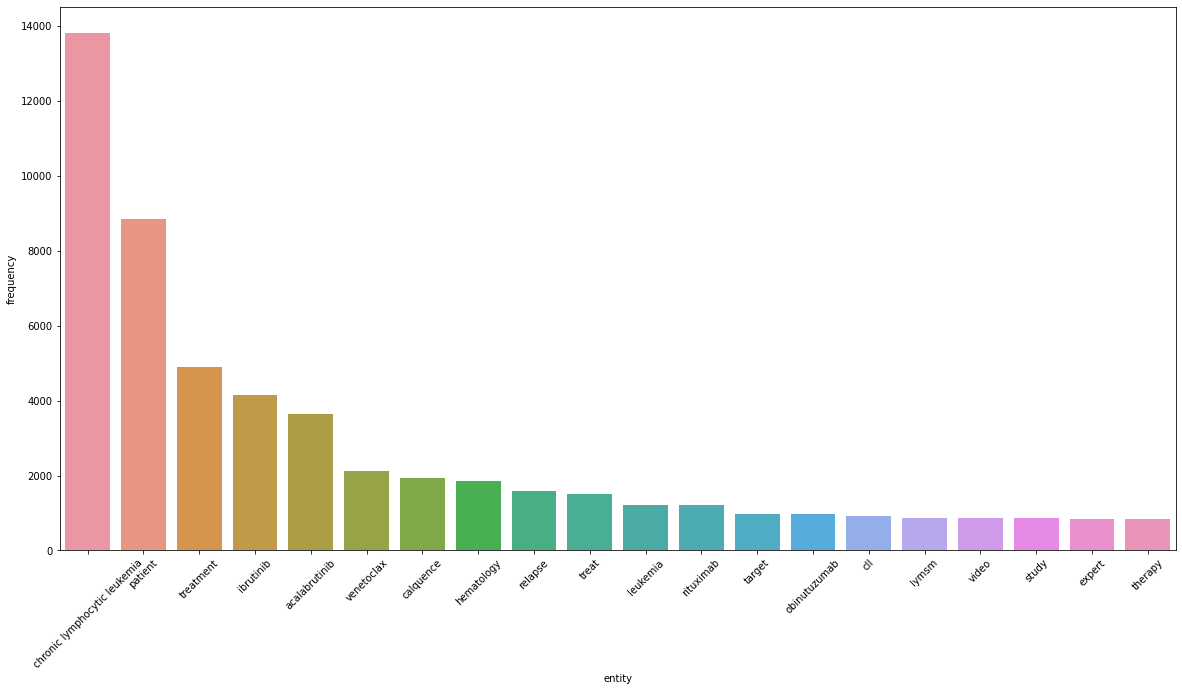

In [ ]:
#Data Visualization with bar graph


df_new = vis.nlargest(columns="frequency", n = 20) 
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_new, x= "entity", y = "frequency")
ax.set(ylabel = 'frequency')
plt.xticks(rotation=45)
plt.show()

**Objective** 1:


***Difficulties***:
-	While using the NLP n-gram techniques to find the entities gives more no. of n-grams and gets lots of time. And also, we get Nouns phrases most of the time it is meaningless too, and treating it as an Entity is a waste.
technique I used for:
-	So, I was moved to technique Named entity recognition which the extracts the features NER, POS tagging, dependency parsing, word vectors and more.

*Reason Why I chose it*
-	Since the data sets were related to the Scientific bio medical revies and tweets. 
-	Hence, Scispacy is the most relatable Corpus had in the scientific domain. There are many modules were available. Here, I am using General Scispacy Large module and Biomedical module which as only NER entity of “Chemical and Diseases”
-	And Scispacy Module Gives the entities as rich as others modules
Note:	The entire NER is performed under the Preprocessed Columns which gives the best results.

*Shortcomings*
-	Here, I omitted the other languages such as Japanese, Chines, etc. This will reduce the sentiment of the particular tweets.
-	And, also, I didn’t use the Dependency parses in the sentences which also gives the more detail to the entities which is extracted.


In [ ]:
#func to collect disseases and chemical names using Scispacy en_ner_bc5cdr_md module

def collect_chem(x):
  doc = sci_nlp2(x)
  chem = [ent.text for ent in doc.ents if ent.label_ == "CHEMICAL"]
  return chem

def collect_diseases(x):
  doc = sci_nlp2(x)
  disease = [ent.text for ent in doc.ents if ent.label_ == "DISEASE"]
  return disease

In [ ]:
#insert the diseases and chemical name in the data frame

data["diseases"]=data["tweet_text_processed"].apply(lambda x:collect_diseases(x))
data["chemicals"]=data["tweet_text_processed"].apply(lambda x:collect_chem(x))

In [ ]:
data.head(10)

,tweet_author,tweet_text,tweet_text_processed,diseases,chemicals
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct phase study acalabrutinib pa...,[],[ibrutinib]
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,[],[]
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice back astrazenecas calquence cll,[],[]
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib valuable option pt intolerant ib...,[],[ibrutinib]
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommend use acalabrutinib patient treat...,"[chronic lymphocytic leukemia, lymsm lymphoma]",[]
1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,nice back astrazeneca calquence cll,[],[]
1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,england decision usually come wale info,[],[]
1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...",astrazeneca calquence acalabrutinib chemothera...,[chronic lymphocytic leukaemia oncology drugap...,[]
1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,superstar tobyeyre82 respond excellent news ni...,[],[]
1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,cll patient know drug ibrutinib yesterday acal...,[],[ibrutinib]


#Sentiment/polarity of Authors

In [ ]:
#Shape of dataframe
print(" Shape of training dataframe: ", data.shape)

 Shape of training dataframe:  (43347, 5)


In [ ]:
null= data.isnull().sum().sort_values(ascending=False)
null

tweet_author            0
tweet_text              0
tweet_text_processed    0
diseases                0
chemicals               0
dtype: int64

Steps involved in solving the Objective 2 are:


*	Downloading sentiment analysis tool i.e., NLTK "vader_lexicon"
*	Test the analyzer with own sentence with all types
*	Create the new columns as “sentiment score “, “polarity” with respect to the sentiment score
*	Solution of Objective 2 (done)


#Downloading sentiment analysis tool i.e. NLTK "vader_lexicon"

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer() #object for the SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Using polarity scores for knowing the polarity of each text

def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

Test the analyser with own sentence with all types



In [ ]:
sentences  = ["Very bad service.Only need order then not stand with commitment.", "Very Bad Service. Only Need Order Then NOT stand with commitment.", "Very bad service.Only need order then not stand with commitment !!??", "Very bad service.Only need order then not stand with commitment :-) :-)", "Very bad service.Only need order then not stand with commitment 😁 💘","Very bad service.Only need order then not stand with commitment lol lmao"]

for i in sentences:
  print (sentiment_analyzer_score(i))

Very bad service.Only need order then not stand with commitment. {'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.7164}
None
Very Bad Service. Only Need Order Then NOT stand with commitment. {'neg': 0.399, 'neu': 0.601, 'pos': 0.0, 'compound': -0.7164}
None
Very bad service.Only need order then not stand with commitment !!?? {'neg': 0.435, 'neu': 0.565, 'pos': 0.0, 'compound': -0.7858}
None
Very bad service.Only need order then not stand with commitment :-) :-) {'neg': 0.322, 'neu': 0.431, 'pos': 0.248, 'compound': -0.335}
None
Very bad service.Only need order then not stand with commitment 😁 💘 {'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.7164}
None
Very bad service.Only need order then not stand with commitment lol lmao {'neg': 0.289, 'neu': 0.387, 'pos': 0.324, 'compound': 0.1835}
None


##hence, Here after I'll use the Scipacy large set of corpus module. because, Scispacy large corpus deliver large set of entity compares to other.

Note: scispacy donot need any lower case conversion, removal of emoji, emoticons, Punctuation, URl, Conjuctions, Degree modifiers, Slangs, etc.,

Every thing mentioned above indicates the increase in magnitude of the sentiment score

#Create the new columns as “sentiment score “, “polarity” with respect to the sentiment score

##creating a new column as 'dict_scores' using dict of all sort of values i.e., 

1.   'neg': -'ive
2.   'neu': neutral
3.   'pos': +'ive
4.   'compound': is the overal sentiment score of the tweets



In [ ]:
data['dict_scores'] = data['tweet_text'].apply(lambda tweet: analyser.polarity_scores(tweet))

In [ ]:
data.iloc[1],data.iloc[1]["dict_scores"],data.iloc[1]["tweet_text"]

(tweet_author                                             Michael Wang, MD
 tweet_text              This phase 2 Acalabrutinib-Venetoclax (AV) tri...
 tweet_text_processed    phase acalabrutinib venetoclax trial still rec...
 diseases                                                               []
 chemicals                                                              []
 dict_scores             {'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...
 Name: 1374032432173842437, dtype: object,
 {'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'compound': 0.2732},
 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N')

##Compound score is the overall polarity score of the sentence. It is range between -1 (most extreme negative) and +1 (most extreme poistive).

In [ ]:
data['sentiment_score']  = data['dict_scores'].apply(lambda dict_scores: dict_scores['compound'])
data.head()

,tweet_author,tweet_text,tweet_text_processed,diseases,chemicals,dict_scores,sentiment_score
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct phase study acalabrutinib pa...,[],[ibrutinib],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,[],[],"{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...",0.2732
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice back astrazenecas calquence cll,[],[],"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.0516
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib valuable option pt intolerant ib...,[],[ibrutinib],"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.8360
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommend use acalabrutinib patient treat...,"[chronic lymphocytic leukemia, lymsm lymphoma]",[],"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6523


Define the Sentiment of the Tweets using polarity score

In [ ]:
data['overall_polarity'] = data['sentiment_score'].apply(lambda c: 'Positive' if c >=0.00  else 'Negative')

data.head()

,tweet_author,tweet_text,tweet_text_processed,diseases,chemicals,dict_scores,sentiment_score,overall_polarity
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct phase study acalabrutinib pa...,[],[ibrutinib],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positive
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,[],[],"{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...",0.2732,Positive
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice back astrazenecas calquence cll,[],[],"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.0516,Negative
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib valuable option pt intolerant ib...,[],[ibrutinib],"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.8360,Positive
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommend use acalabrutinib patient treat...,"[chronic lymphocytic leukemia, lymsm lymphoma]",[],"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6523,Positive


##creating the new entity column as per the required .csv constrains

In [ ]:
def sear(x):
  y=x.split()
  z=[i for i in entities_set if i in y]
  q=", ".join(z)
  return q      

In [ ]:
data["entity"] = data["tweet_text_processed"].apply(lambda x: sear(x))
data.head()

,tweet_author,tweet_text,tweet_text_processed,diseases,chemicals,dict_scores,sentiment_score,overall_polarity,entity
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct phase study acalabrutinib pa...,[],[ibrutinib],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positive,"study, phase, relapsed, cll, acalabrutinib, in..."
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,[],[],"{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...",0.2732,Positive,"non, therapy, mcl, study, phase, relapsed, ven..."
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice back astrazenecas calquence cll,[],[],"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.0516,Negative,"calquence, cll"
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib valuable option pt intolerant ib...,[],[ibrutinib],"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.8360,Positive,"cll, haematologica, data, acalabrutinib, intol..."
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommend use acalabrutinib patient treat...,"[chronic lymphocytic leukemia, lymsm lymphoma]",[],"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6523,Positive,"lymsm, acalabrutinib, patient, lymphoma, chron..."


In [ ]:
data.iloc[9]["entity"]

'pirtobrutinib, clinicaltrials, impact, cancertrials, cll, acalabrutinib, recent, patient, cllsociety, bloodcancerirl, relapse, drug, ibrutinib'

In [ ]:
data['author_name'] = data['tweet_author'].str.replace("[^a-zA-Z0-9]", " ")
data['author_name'] = [t.lower() for t in data['author_name']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,tweet_author,tweet_text,tweet_text_processed,diseases,chemicals,dict_scores,sentiment_score,overall_polarity,entity,author_name
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct phase study acalabrutinib pa...,[],[ibrutinib],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positive,"study, phase, relapsed, cll, acalabrutinib, in...",hematopoiesis news
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,[],[],"{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...",0.2732,Positive,"non, therapy, mcl, study, phase, relapsed, ven...",michael wang md
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice back astrazenecas calquence cll,[],[],"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.0516,Negative,"calquence, cll",1stoncology
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib valuable option pt intolerant ib...,[],[ibrutinib],"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.8360,Positive,"cll, haematologica, data, acalabrutinib, intol...",toby eyre
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommend use acalabrutinib patient treat...,"[chronic lymphocytic leukemia, lymsm lymphoma]",[],"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6523,Positive,"lymsm, acalabrutinib, patient, lymphoma, chron...",lymphoma hub


In [ ]:
#seprate dataframe for the objective2

objective2 = data[['entity', 'author_name', 'overall_polarity']].copy()
objective2

,entity,author_name,overall_polarity
1374140386071961602,"study, phase, relapsed, cll, acalabrutinib, in...",hematopoiesis news,Positive
1374032432173842437,"non, therapy, mcl, study, phase, relapsed, ven...",michael wang md,Positive
1373902876553048065,"calquence, cll",1stoncology,Negative
1373656782367813635,"cll, haematologica, data, acalabrutinib, intol...",toby eyre,Positive
1372941634334232586,"lymsm, acalabrutinib, patient, lymphoma, chron...",lymphoma hub,Positive
...,...,...,...
551103473643945985,"cll, friend",joy is a lifestyle,Positive
551102786675290112,"cll, friend",,Positive
550969541186953217,"idelalisib, cll, zusatznutzen",iqwig,Positive
550941480525635584,"chronic, immunochemotherapy, expression, outco...",medibooks,Positive


In [ ]:
objective2.to_csv('objective2.csv',index=False)

***Objective 2:***


technique I used for is “vader_lexicon” of SentimentIntensityAnalyzer


*Reason Why I chose it*


•	Since the data sets were mixed of URL, Emojis, Emoicons, #hastags, Caps, @mentions, Other languanges, Etc, 
•	Hence, vader_lexicon Donot need the tweets precleaned
•	Because, All the mentioned charcters gives the major role in the polarity score using vader_lexicon model.
